# Apache Spark

### Author: Kovalev Evgeny

In this homework, I needed to use Apache Spark to analyze the following data: https://www.kaggle.com/sharthz23/sna-hackathon-2019-collaboration. Tasks:

1. Find most popular groups for each object type
2. Plot histograms of popularity and activity according to daytime
3. Calculate correlations between target and features
4. Find some insights in the data

In [1]:
import $ivy.`io.github.cibotech::evilplot-repl:0.8.1`
import $ivy.`org.apache.spark::spark-sql:2.4.6`

import com.cibo.evilplot.plot._
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._
import com.cibo.evilplot.plot.renderers.BarRenderer

import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)

import org.apache.spark.sql._
import org.apache.spark.sql.functions.{array_contains, col, desc, mean}

val spark = {
  AmmoniteSparkSession.builder()
    .master("local[*]")
    .config("spark.ui.showConsoleProgress", "false")
    .getOrCreate()
}

import spark.implicits._

Loading spark-stubs
Getting spark JARs
Creating SparkSession


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


import $ivy.$                                        

import $ivy.$                                  


import com.cibo.evilplot.plot._

import com.cibo.evilplot.plot.aesthetics.DefaultTheme._

import com.cibo.evilplot.plot.renderers.BarRenderer


import org.apache.log4j.{Level, Logger}

import org.apache.spark.sql._

import org.apache.spark.sql.functions.{array_contains, col, desc, mean}


spark: SparkSession = org.apache.spark.sql.SparkSession@6576cf86
import spark.implicits._

In [2]:
// A function for visualizing dataframe
// https://github.com/almond-sh/almond/issues/180

implicit class RichDF(val ds:DataFrame) {
    def showHTML(limit:Int = 20, truncate: Int = 20) = {
        import xml.Utility.escape
        val data = ds.take(limit)
        val header = ds.schema.fieldNames.toSeq        
        val rows: Seq[Seq[String]] = data.map { row =>
          row.toSeq.map { cell =>
            val str = cell match {
              case null => "null"
              case binary: Array[Byte] => binary.map("%02X".format(_)).mkString("[", " ", "]")
              case array: Array[_] => array.mkString("[", ", ", "]")
              case seq: Seq[_] => seq.mkString("[", ", ", "]")
              case _ => cell.toString
            }
            if (truncate > 0 && str.length > truncate) {
              // do not show ellipses for strings shorter than 4 characters.
              if (truncate < 4) str.substring(0, truncate)
              else str.substring(0, truncate - 3) + "..."
            } else {
              str
            }
          }: Seq[String]
        }

        publish.html(s""" <table>
                <tr>
                 ${header.map(h => s"<th>${escape(h)}</th>").mkString}
                </tr>
                ${rows.map { row =>
                  s"<tr>${row.map{c => s"<td>${escape(c)}</td>" }.mkString}</tr>"
                }.mkString}
            </table>
        """)        
    }
}

defined class RichDF

In [3]:
var df = spark.read.format("parquet").load("data")
df.showHTML(5)

instanceId_userId,instanceId_objectType,instanceId_objectId,audit_pos,audit_clientType,audit_timestamp,audit_timePassed,audit_experiment,audit_resourceType,metadata_ownerId,metadata_ownerType,metadata_createdAt,metadata_authorId,metadata_applicationId,metadata_numCompanions,metadata_numPhotos,metadata_numPolls,metadata_numSymbols,metadata_numTokens,metadata_numVideos,metadata_platform,metadata_totalVideoLength,metadata_options,relationsMask,userOwnerCounters_USER_FEED_REMOVE,userOwnerCounters_USER_PROFILE_VIEW,userOwnerCounters_VOTE_POLL,userOwnerCounters_USER_SEND_MESSAGE,userOwnerCounters_USER_DELETE_MESSAGE,userOwnerCounters_USER_INTERNAL_LIKE,userOwnerCounters_USER_INTERNAL_UNLIKE,userOwnerCounters_USER_STATUS_COMMENT_CREATE,userOwnerCounters_PHOTO_COMMENT_CREATE,userOwnerCounters_MOVIE_COMMENT_CREATE,userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE,userOwnerCounters_COMMENT_INTERNAL_LIKE,userOwnerCounters_USER_FORUM_MESSAGE_CREATE,userOwnerCounters_PHOTO_MARK_CREATE,userOwnerCounters_PHOTO_VIEW,userOwnerCounters_PHOTO_PIN_BATCH_CREATE,userOwnerCounters_PHOTO_PIN_UPDATE,userOwnerCounters_USER_PRESENT_SEND,userOwnerCounters_UNKNOWN,userOwnerCounters_CREATE_TOPIC,userOwnerCounters_CREATE_IMAGE,userOwnerCounters_CREATE_MOVIE,userOwnerCounters_CREATE_COMMENT,userOwnerCounters_CREATE_LIKE,userOwnerCounters_TEXT,userOwnerCounters_IMAGE,userOwnerCounters_VIDEO,ownerUserCounters_USER_FEED_REMOVE,ownerUserCounters_USER_PROFILE_VIEW,ownerUserCounters_VOTE_POLL,ownerUserCounters_USER_SEND_MESSAGE,ownerUserCounters_USER_DELETE_MESSAGE,ownerUserCounters_USER_INTERNAL_LIKE,ownerUserCounters_USER_INTERNAL_UNLIKE,ownerUserCounters_USER_STATUS_COMMENT_CREATE,ownerUserCounters_PHOTO_COMMENT_CREATE,ownerUserCounters_MOVIE_COMMENT_CREATE,ownerUserCounters_USER_PHOTO_ALBUM_COMMENT_CREATE,ownerUserCounters_COMMENT_INTERNAL_LIKE,ownerUserCounters_USER_FORUM_MESSAGE_CREATE,ownerUserCounters_PHOTO_MARK_CREATE,ownerUserCounters_PHOTO_VIEW,ownerUserCounters_PHOTO_PIN_BATCH_CREATE,ownerUserCounters_PHOTO_PIN_UPDATE,ownerUserCounters_USER_PRESENT_SEND,ownerUserCounters_UNKNOWN,ownerUserCounters_CREATE_TOPIC,ownerUserCounters_CREATE_IMAGE,ownerUserCounters_CREATE_MOVIE,ownerUserCounters_CREATE_COMMENT,ownerUserCounters_CREATE_LIKE,ownerUserCounters_TEXT,ownerUserCounters_IMAGE,ownerUserCounters_VIDEO,membership_status,membership_statusUpdateDate,membership_joinDate,membership_joinRequestDate,owner_create_date,owner_birth_date,owner_gender,owner_status,owner_ID_country,owner_ID_Location,owner_is_active,owner_is_deleted,owner_is_abused,owner_is_activated,owner_change_datime,owner_is_semiactivated,owner_region,user_create_date,user_birth_date,user_gender,user_status,user_ID_country,user_ID_Location,user_is_active,user_is_deleted,user_is_abused,user_is_activated,user_change_datime,user_is_semiactivated,user_region,feedback,objectId,auditweights_ageMs,auditweights_closed,auditweights_ctr_gender,auditweights_ctr_high,auditweights_ctr_negative,auditweights_dailyRecency,auditweights_feedOwner_RECOMMENDED_GROUP,auditweights_feedStats,auditweights_friendCommentFeeds,auditweights_friendCommenters,auditweights_friendLikes,auditweights_friendLikes_actors,auditweights_hasDetectedText,auditweights_hasText,auditweights_isPymk,auditweights_isRandom,auditweights_likersFeedStats_hyper,auditweights_likersSvd_prelaunch_hyper,auditweights_matrix,auditweights_notOriginalPhoto,auditweights_numDislikes,auditweights_numLikes,auditweights_numShows,auditweights_onlineVideo,auditweights_partAge,auditweights_partCtr,auditweights_partSvd,auditweights_processedVideo,auditweights_relationMasks,auditweights_source_LIVE_TOP,auditweights_source_MOVIE_TOP,auditweights_svd_prelaunch,auditweights_svd_spark,auditweights_userAge,auditweights_userOwner_CREATE_COMMENT,auditweights_userOwner_CREATE_IMAGE,auditweights_userOwner_CREATE_LIKE,auditweights_userOwner_IMAGE,auditweights_userOwner_MOVIE_COMMENT_CREATE,auditweights_userOwner_PHOTO_COMMENT_CREATE,auditweights_userOwner_PHOTO_MARK_CREATE,

df: DataFrame = [instanceId_userId: int, instanceId_objectType: string ... 167 more fields]

## 1. Most popular groups for each object type

In [4]:
var df_liked = df.filter(array_contains(col("feedback"), "Liked"))
var df_liked_groupby = df_liked.groupBy("instanceId_objectType", "instanceId_objectId").count()

df_liked: Dataset[Row] = [instanceId_userId: int, instanceId_objectType: string ... 167 more fields]
df_liked_groupby: DataFrame = [instanceId_objectType: string, instanceId_objectId: int ... 1 more field]

Top-5 groups for posts:

In [5]:
df_liked_groupby.createOrReplaceTempView("objects")

spark.sql("""
    SELECT * FROM objects
    WHERE instanceId_objectType = 'Post'
    ORDER BY count DESC
""").showHTML(5)

instanceId_objectType,instanceId_objectId,count
Post,19152905,689
Post,11300713,660
Post,38567725,568
Post,31009524,560
Post,35514331,544


Top-5 groups for photos:

In [6]:
spark.sql("""
    SELECT * FROM objects
    WHERE instanceId_objectType = 'Photo'
    ORDER BY count DESC
""").showHTML(5)

instanceId_objectType,instanceId_objectId,count
Photo,6537034,215
Photo,7001118,171
Photo,7474842,152
Photo,6644424,145
Photo,1790708,134


Top-5 groups for videos:

In [7]:
spark.sql("""
    SELECT * FROM objects
    WHERE instanceId_objectType = 'Video'
    ORDER BY count DESC
""").showHTML(5)

instanceId_objectType,instanceId_objectId,count
Video,535842,1329
Video,1282812,868
Video,603629,822
Video,1041333,633
Video,9458730,569


## 2. Histograms of popularity/activity according to daytime

In [8]:
var df_popularity = df.filter(array_contains(col("feedback"), "Liked"))
var df_activity = df.filter(!array_contains(col("feedback"), "Ignored"))

df_popularity.createOrReplaceTempView("popularity")
df_activity.createOrReplaceTempView("activity")

var df_popularity_hours = spark.sql("""
    SELECT from_unixtime(audit_timestamp, 'HH') AS audit_timestamp_hour FROM popularity
""").groupBy("audit_timestamp_hour").count().orderBy("audit_timestamp_hour")
var df_activity_hours = spark.sql("""
    SELECT from_unixtime(audit_timestamp, 'HH') AS audit_timestamp_hour FROM activity
""").groupBy("audit_timestamp_hour").count().orderBy("audit_timestamp_hour")

df_popularity: Dataset[Row] = [instanceId_userId: int, instanceId_objectType: string ... 167 more fields]
df_activity: Dataset[Row] = [instanceId_userId: int, instanceId_objectType: string ... 167 more fields]
df_popularity_hours: Dataset[Row] = [audit_timestamp_hour: string, count: bigint]
df_activity_hours: Dataset[Row] = [audit_timestamp_hour: string, count: bigint]

As we can see in the plots below, the popularity correlates with activity. Also the biggest activity happens around 6 hours, the smallest happens around 14 hours.

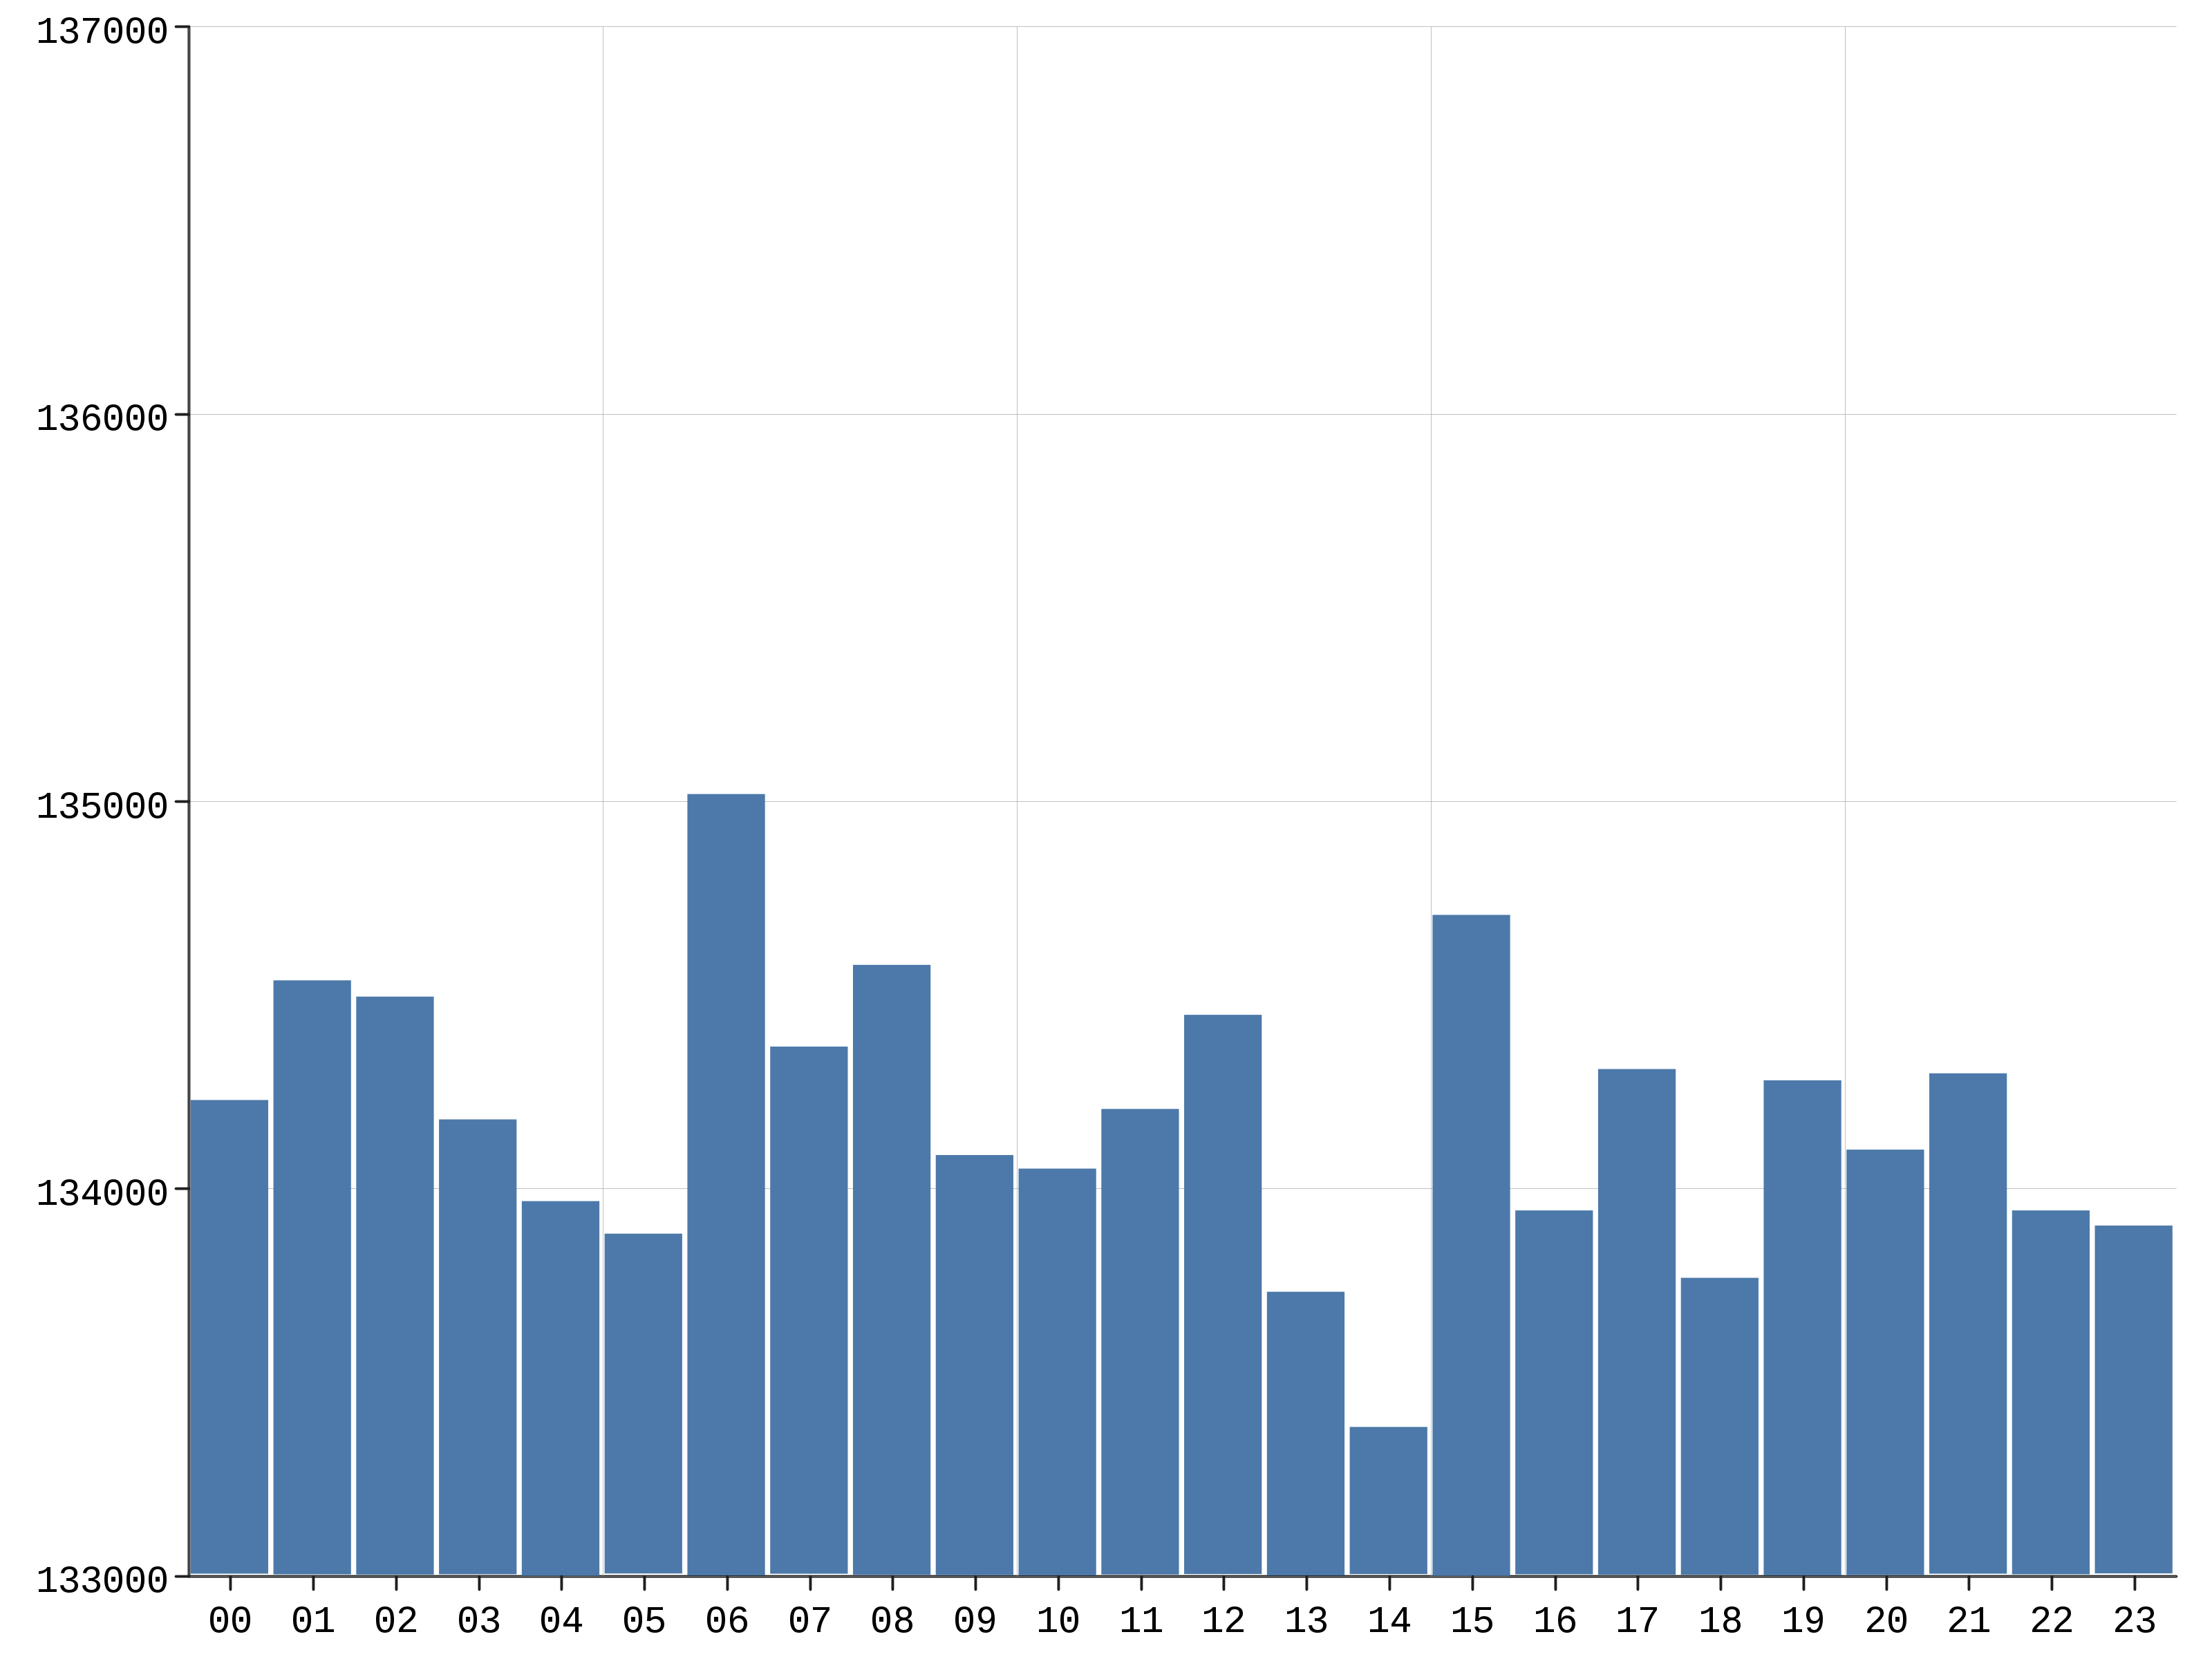

defined function showPlot
x_popularity: Seq[String] = WrappedArray(
  "00",
  "01",
  "02",
  "03",
  "04",
  "05",
  "06",
  "07",
  "08",
  "09",
  "10",
  "11",
  "12",
  "13",
  "14",
  "15",
  "16",
  "17",
  "18",
  "19",
  "20",
  "21",
  "22",
  "23"
)
y_popularity: Seq[Double] = WrappedArray(
  134229.0,
  134538.0,
  134496.0,
  134179.0,
  133968.0,
  133884.0,
  135019.0,
  134367.0,
  134578.0,
  134087.0,
  134052.0,
  134206.0,
  134449.0,
  133734.0,
  133385.0,
  134707.0,
  133944.0,
  134309.0,
  133770.0,
  134280.0,
  134101.0,
  134298.0,
  133944.0,
  133905.0
)

In [9]:
def showPlot(plot: com.cibo.evilplot.geometry.Drawable) = Image.fromRenderedImage(plot.asBufferedImage, format=Image.PNG)

var x_popularity = df_popularity_hours.select("audit_timestamp_hour").collect().map(r => r(0).toString).toSeq
var y_popularity = df_popularity_hours.select("count").collect().map(r => r(0).toString.toDouble).toSeq

showPlot(BarChart(y_popularity).standard(xLabels = x_popularity).render())

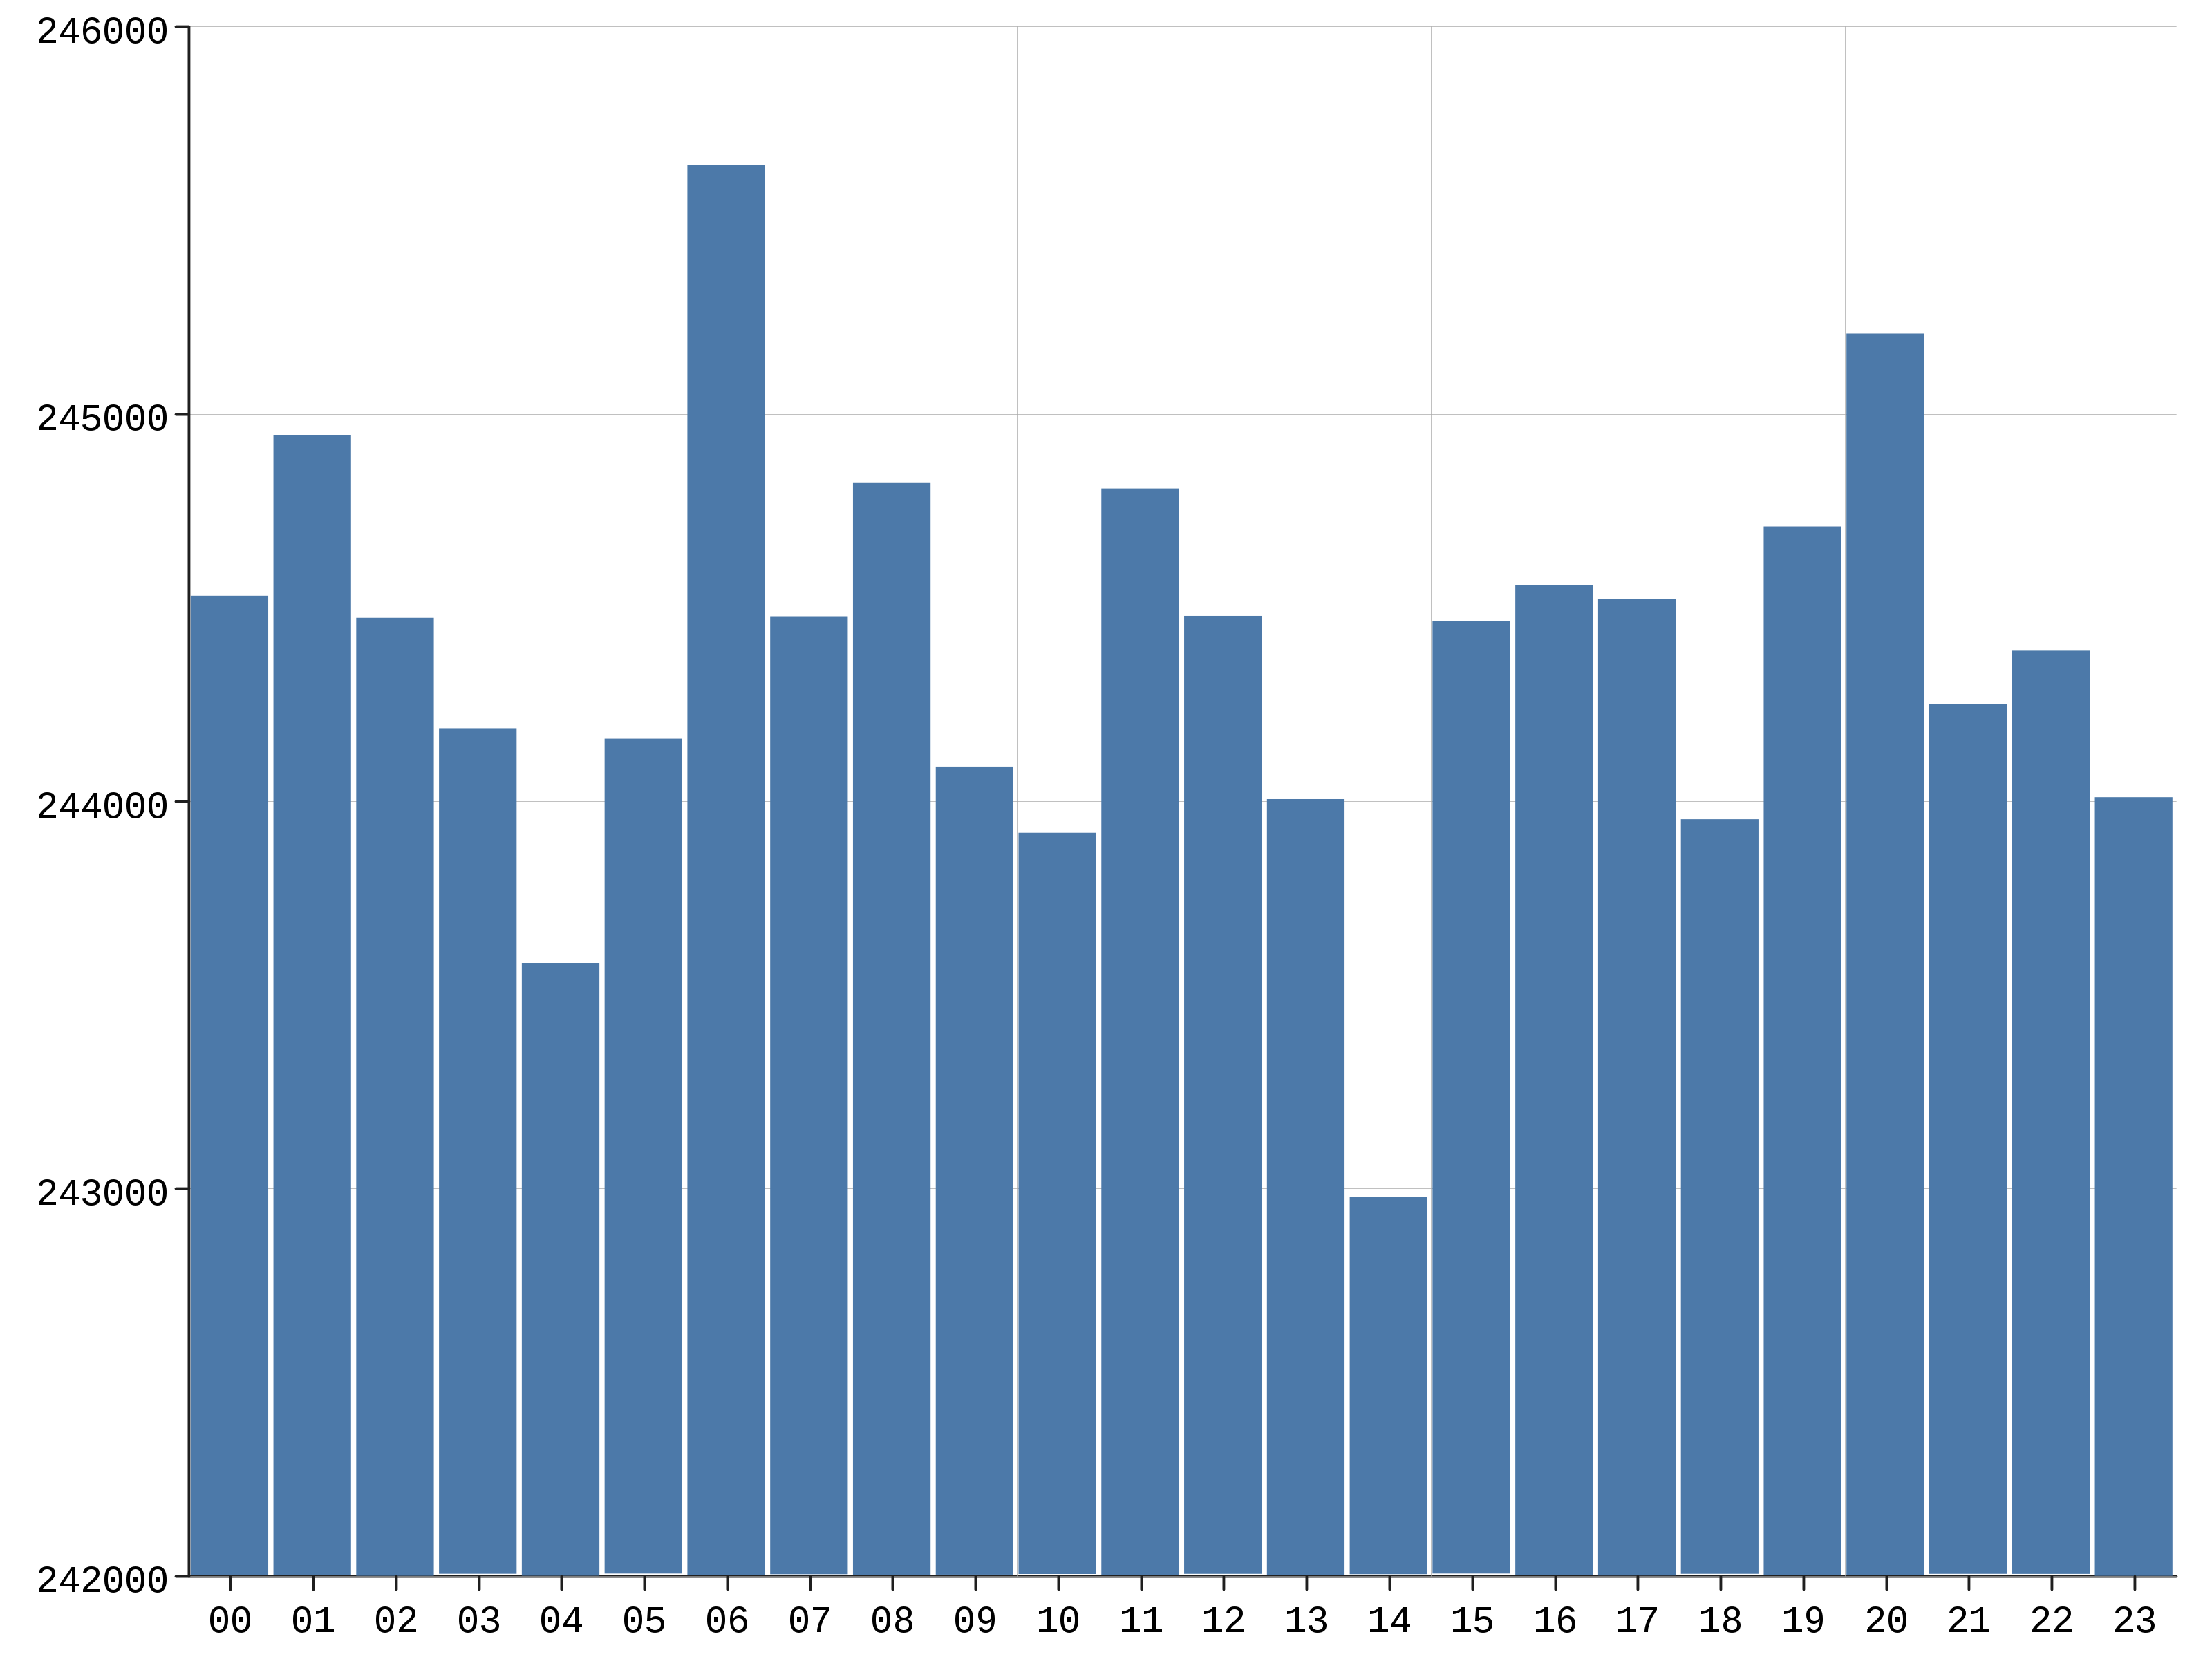

defined function showPlot
x_activity: Seq[String] = WrappedArray(
  "00",
  "01",
  "02",
  "03",
  "04",
  "05",
  "06",
  "07",
  "08",
  "09",
  "10",
  "11",
  "12",
  "13",
  "14",
  "15",
  "16",
  "17",
  "18",
  "19",
  "20",
  "21",
  "22",
  "23"
)
y_activity: Seq[Double] = WrappedArray(
  244531.0,
  244946.0,
  244474.0,
  244189.0,
  243583.0,
  244162.0,
  245644.0,
  244478.0,
  244822.0,
  244090.0,
  243919.0,
  244808.0,
  244479.0,
  244006.0,
  242979.0,
  244466.0,
  244559.0,
  244523.0,
  243954.0,
  244710.0,
  245208.0,
  244251.0,
  244389.0,
  244011.0
)

In [10]:
def showPlot(plot: com.cibo.evilplot.geometry.Drawable) = Image.fromRenderedImage(plot.asBufferedImage, format=Image.PNG)

var x_activity = df_activity_hours.select("audit_timestamp_hour").collect().map(r => r(0).toString).toSeq
var y_activity = df_activity_hours.select("count").collect().map(r => r(0).toString.toDouble).toSeq

showPlot(BarChart(y_activity).standard(xLabels = x_activity).render())

## 3. Feature/target correlations

In [11]:
df.createOrReplaceTempView("data")

var df_target = spark.sql("""
    SELECT *,
    CASE
        WHEN ARRAY_CONTAINS(feedback,'Liked') THEN 1
        ELSE 0
    END AS target FROM data
""")


df_target: DataFrame = [instanceId_userId: int, instanceId_objectType: string ... 168 more fields]

In [12]:
for (i <- 0 to df_target.columns.size - 2){
    var col = df_target.columns(i)
    var col_type = df_target.schema(col).dataType.typeName
    if (col_type == "integer" || col_type == "double" || col_type == "long"){
        var corr = df_target.stat.corr(col, "target")  
        println("Correlation betweeen target and " + col + ": \t" + corr)
    }
}

Correlation betweeen target and instanceId_userId: 	0.03197228784565751
Correlation betweeen target and instanceId_objectId: 	0.03876479710067908
Correlation betweeen target and audit_pos: 	0.005763417569643013
Correlation betweeen target and audit_timestamp: 	-0.001962748441524283
Correlation betweeen target and audit_timePassed: 	0.013533036575524453
Correlation betweeen target and audit_resourceType: 	0.04556814618859269
Correlation betweeen target and metadata_ownerId: 	0.011679487961495113
Correlation betweeen target and metadata_createdAt: 	7.344791555101064E-4
Correlation betweeen target and metadata_authorId: 	0.007233333042612959
Correlation betweeen target and metadata_applicationId: 	NaN
Correlation betweeen target and metadata_numCompanions: 	-0.004849676228064268
Correlation betweeen target and metadata_numPhotos: 	0.011189914312247778
Correlation betweeen target and metadata_numPolls: 	0.08114650487156022
Correlation betweeen target and metadata_numSymbols: 	-0.0332840579

As we can see, the correlations are pretty low. The most correlated feature with `target` is `auditweights_ctr_high` (0.1455). It is pretty logical, because the bigger the CTR, the higher is the probability to put a like.

## 4. Dataset insights

Users tend to like shorter videos more than longer videos:

In [13]:
df_target.groupBy("target").agg(mean("metadata_totalVideoLength")).showHTML()

target,avg(metadata_totalVideoLength)
1,17262.65777168197
0,37818.335532989


Users tend to like videos with larger number of likes:

In [14]:
df_target.groupBy("target").agg(mean("auditweights_numLikes")).showHTML()

target,avg(auditweights_numLikes)
1,3283.960197438868
0,2644.794727201556


Users tend to like popular videos more than the rare ones:

In [15]:
df_target.groupBy("target").agg(mean("auditweights_numShows")).showHTML()

target,avg(auditweights_numShows)
1,2695944.7802271405
0,1506601.6678871273
